In [63]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from sklearn.model_selection import train_test_split
from pandas import DataFrame

In [58]:
FLT_1 = pd.read_excel('FLT 1 datasets.xlsx')
a = FLT_1.drop(columns='t(s)')
a

,aoa (deg),pitch (deg),pitch speed (deg/s),true speed (m/s),x acceleration (m/s2),z acceleration (m/s2),Cd,Cl,Cm
0,1.978644,1.994105,0.009835,50.741865,1.053801,-7.403692,0.050988,0.460989,0.001941
1,1.978343,1.994686,0.009787,50.742590,1.054149,-7.405721,0.050972,0.461021,0.001953
2,1.978041,1.995267,0.009738,50.743315,1.054484,-7.407809,0.050956,0.461052,0.001966
3,1.977740,1.995847,0.009690,50.744040,1.054807,-7.409959,0.050941,0.461083,0.001978
4,1.977439,1.996428,0.009642,50.744765,1.055118,-7.412167,0.050925,0.461115,0.001990
...,...,...,...,...,...,...,...,...,...
99995,2.391689,2.924688,-0.012253,50.285324,0.749623,-9.715756,0.043411,0.416994,-0.004519
99996,2.391753,2.924688,-0.012253,50.285324,0.749756,-9.716056,0.043395,0.416750,-0.004529
99997,2.391817,2.924688,-0.012253,50.285324,0.749889,-9.716355,0.043379,0.416508,-0.004539
99998,2.391882,2.924688,-0.012253,50.285324,0.750021,-9.716652,0.043364,0.416266,-0.004549


In [73]:
x = a[0:(len(a)-1)]
y = a[1:(len(a))]

print(x.shape)
print(y.shape)

x_main, x_test, y_main, y_test = train_test_split(x, y, test_size = 10000)
x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size = 10000)

print (x_test.shape)
print (x_train.shape)
print (x_val.shape)

x_test = DataFrame.sort_index(x_test, ignore_index=True)
y_test = DataFrame.sort_index(y_test, ignore_index=True)

x_train = DataFrame.sort_index(x_train, ignore_index=True)
y_train = DataFrame.sort_index(y_train, ignore_index=True)

x_val = DataFrame.sort_index(x_val, ignore_index=True)
y_val = DataFrame.sort_index(y_val, ignore_index=True)

x_test = x_test.drop(columns='Cd').drop(columns='Cl').drop(columns='Cm')
x_train = x_train.drop(columns='Cd').drop(columns='Cl').drop(columns='Cm')
x_val = x_val.drop(columns='Cd').drop(columns='Cl').drop(columns='Cm')

y_test = y_test.drop(columns='aoa (deg)').drop(columns='pitch (deg)').drop(columns='pitch speed (deg/s)').drop(columns='true speed (m/s)').drop(columns='x acceleration (m/s2)').drop(columns='z acceleration (m/s2)')
y_train = y_train.drop(columns='aoa (deg)').drop(columns='pitch (deg)').drop(columns='pitch speed (deg/s)').drop(columns='true speed (m/s)').drop(columns='x acceleration (m/s2)').drop(columns='z acceleration (m/s2)')
y_val = y_val.drop(columns='aoa (deg)').drop(columns='pitch (deg)').drop(columns='pitch speed (deg/s)').drop(columns='true speed (m/s)').drop(columns='x acceleration (m/s2)').drop(columns='z acceleration (m/s2)')

x_test = x_test.to_numpy()
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()

y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()


(99999, 9)
(99999, 9)
(10000, 9)
(79999, 9)
(10000, 9)


In [74]:

# x = x_transpose
# y = y
initializers = keras.initializers.GlorotNormal()
model = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(7 ,activation = "sigmoid"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.0008)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['Accuracy']
               )

history = model.fit(x_train, y_train, validation_data=[x_val, y_val], epochs = 1000, batch_size=100)
model.summary()




Epoch 1/1000
800/800 [==============================] - 3s 2ms/step - loss: 0.0197 - Accuracy: 0.9990 - val_loss: 8.0543e-04 - val_Accuracy: 1.0000
Epoch 2/1000
800/800 [==============================] - 1s 1ms/step - loss: 3.2389e-04 - Accuracy: 1.0000 - val_loss: 1.6809e-04 - val_Accuracy: 1.0000
Epoch 3/1000
800/800 [==============================] - 1s 1ms/step - loss: 1.3430e-04 - Accuracy: 1.0000 - val_loss: 1.0798e-04 - val_Accuracy: 1.0000
Epoch 4/1000
800/800 [==============================] - 1s 1ms/step - loss: 9.6133e-05 - Accuracy: 1.0000 - val_loss: 8.7612e-05 - val_Accuracy: 1.0000
Epoch 5/1000
800/800 [==============================] - 1s 1ms/step - loss: 8.0397e-05 - Accuracy: 1.0000 - val_loss: 7.4703e-05 - val_Accuracy: 1.0000
Epoch 6/1000
800/800 [==============================] - 1s 1ms/step - loss: 7.5028e-05 - Accuracy: 1.0000 - val_loss: 7.1913e-05 - val_Accuracy: 1.0000
Epoch 7/1000
800/800 [==============================] - 1s 2ms/step - loss: 7.1956e-05 - Acc

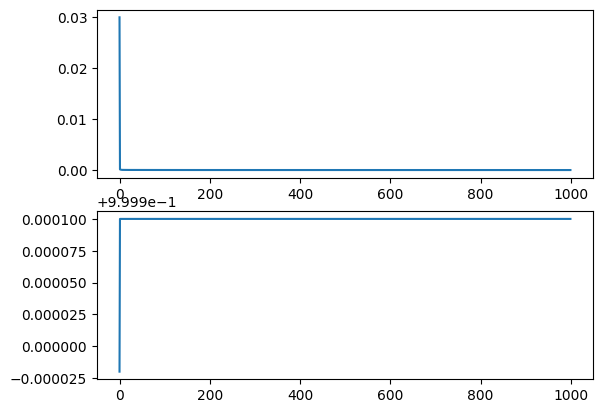

In [34]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'])
ax[1].plot(history.history['Accuracy'])

In [35]:
y_pred = model.predict(x)

3125/3125 [==============================] - 5s 1ms/step


In [36]:
y_pred.shape

(100000, 3)

In [52]:
print('R-square:',r2_score(y[:len(y)], y_pred))

R-square: 0.7517660523846974


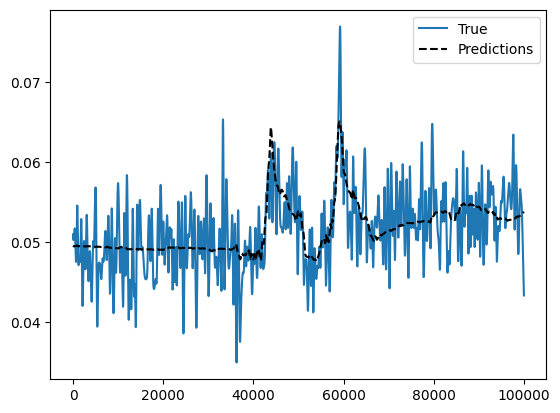

In [50]:

plt.plot (yt[:,0], label="True")
plt.plot (y_pred[:,0], 'k--', label='Predictions')

plt.legend()

NameError: name 'data' is not defined

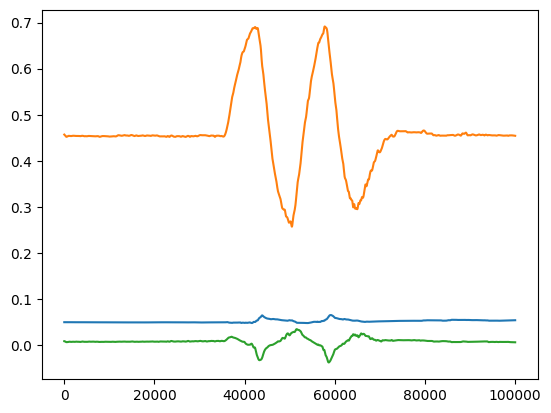

In [44]:
N_data = len(y_pred)
plt.plot (y_pred, label='Predictions')
plt.plot (data, label="True")
plt.xlim(0, N_data)
plt.legend()

In [ ]:
Cd2 = y_pred[:, 4]
Cd2

IndexError: index 4 is out of bounds for axis 1 with size 1

In [29]:
plt.figure()
plt.plot (FLT_1['Cd'])
plt.plot (Cd2)


KeyError: 'Cd'

<Figure size 640x480 with 0 Axes>